In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
plt.xkcd();
sns.set_style({'font.family': ['sans-serif'],
 'font.sans-serif': [
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
     'Arial',
  'sans-serif']})

In [2]:
intentcity_palette=sns.color_palette(["#303030", "#EB0000", ])

Text(0.5, 1, 'Among rough sleepers, men are more concentrated\n in urban areas than women - or women in urban\n urban areas are less likely to use services')

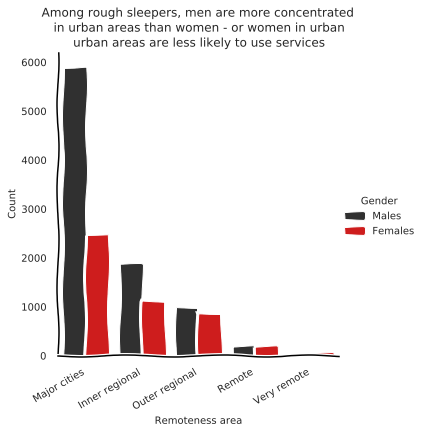

In [3]:
df = pd.read_excel("../data/rough_sleepers_summary.xlsx")

df2 = df.copy()
for i in range(1,4):
    df2.iloc[0:5,i] = round(df.iloc[0:5,i]*df.iloc[5,i]/100)

df_melted = pd.melt(df2.iloc[0:5,:], id_vars=["Remoteness area"], 
                    value_vars=["Males", "Females"], value_name="Count", var_name="Gender")

g = sns.catplot(data=df_melted, x='Remoteness area', y="Count", hue="Gender", kind="bar", palette=intentcity_palette)
g.set_xticklabels(rotation=30, horizontalalignment='right')
plt.title("Among rough sleepers, men are more concentrated\n in urban areas than women"+\
          " - or women in urban\n urban areas are less likely to use services")

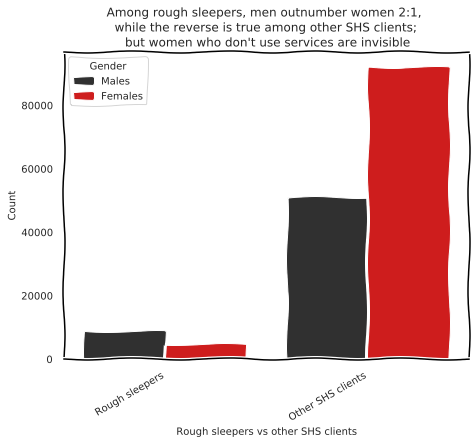

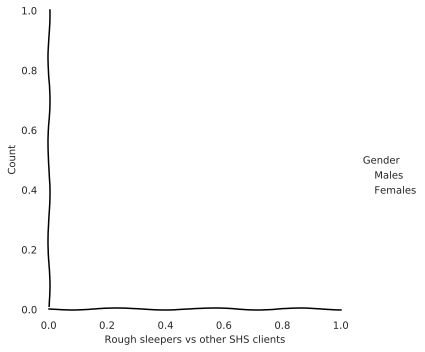

In [4]:
df = pd.read_excel("../data/rough_sleepers_summary.xlsx", sheet_name=2)

df_melted = pd.melt(df, id_vars="Gender", value_vars=["Rough sleepers","Other SHS clients"],
                    var_name="Rough sleepers vs other SHS clients", value_name="Count")
fig, g = plt.subplots(figsize=(9,7.5))
plt.tight_layout(pad=10.4, w_pad=8.5, h_pad=1.0)
sns.catplot(ax=g, data=df_melted, x='Rough sleepers vs other SHS clients', 
                y="Count", hue="Gender", kind="bar", palette=intentcity_palette)
g.set_xticklabels(labels=["Rough sleepers","Other SHS clients"],rotation=30, horizontalalignment='right')
g.set_title("Among rough sleepers, men outnumber women 2:1, \n"+\
          "while the reverse is true among other SHS clients;\n "+\
          "but women who don't use services are invisible")
fig.savefig('rough_sleepers_gender.png', format='png', dpi=350)

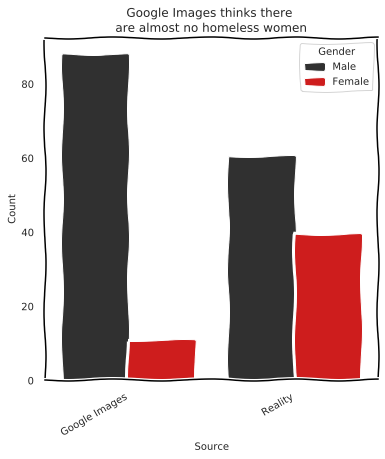

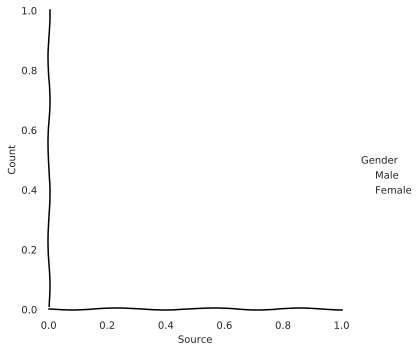

In [5]:
df = pd.read_excel("../data/rough_sleepers_summary.xlsx", sheet_name=1)


fig, g = plt.subplots(figsize=(8,8))
plt.tight_layout(pad=10.4, w_pad=8.5, h_pad=1.0)
sns.catplot(ax=g, data=df, x='Source', 
                y="Count", hue="Gender", kind="bar", palette=intentcity_palette)
g.set_xticklabels(labels=["Google Images","Reality"],rotation=30, horizontalalignment='right')
g.set_title("Google Images thinks there \nare almost no homeless women")
fig.savefig('google_gender.png', format='png', dpi=350)

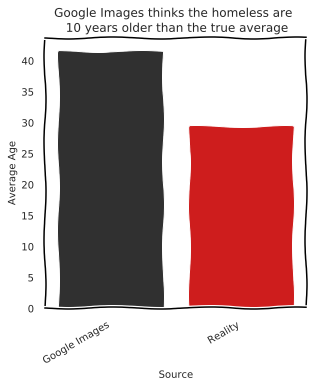

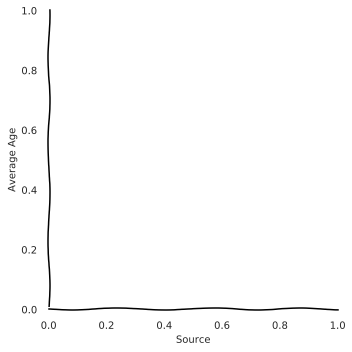

In [6]:
df = pd.read_excel("../data/rough_sleepers_summary.xlsx", sheet_name=4)

fig, g = plt.subplots(figsize=(7,7))
plt.tight_layout(pad=10.4, w_pad=8.5, h_pad=1.0)
sns.catplot(ax=g, data=df, x='Source', 
                y="Average Age", kind="bar", palette=intentcity_palette)
g.set_xticklabels(labels=["Google Images","Reality"],rotation=30, horizontalalignment='right')
g.set_title("Google Images thinks the homeless are \n 10 years older than the true average")
fig.savefig('google_age.png', format='png', dpi=350)

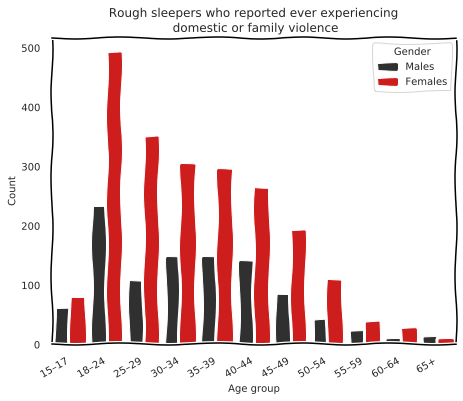

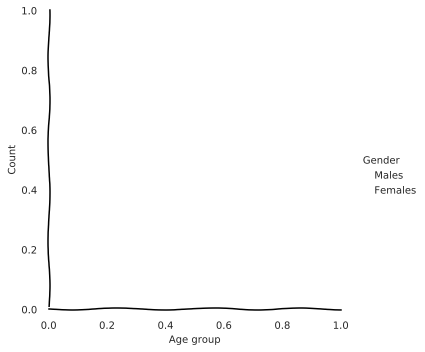

In [7]:
df = pd.read_excel("../data/rough_sleepers_summary.xlsx", sheet_name=3)

df2 = df.copy()
for i in range(1,3):
    df2.iloc[0:11,i] = round(df.iloc[0:11,i]*df.iloc[11,i]/100)
fig, g = plt.subplots(figsize=(9,7.5))
plt.tight_layout(pad=10.4, w_pad=8.5, h_pad=1.0)

df_melted = pd.melt(df2.iloc[0:11,], id_vars="Age group", value_vars=["Males", "Females"],
                    var_name="Gender", value_name="Count")
sns.catplot(ax=g,data=df_melted, x='Age group', y="Count", hue="Gender", kind="bar", palette=intentcity_palette)
g.set_xticklabels(labels=df_melted['Age group'].unique(),rotation=30, horizontalalignment='right')
g.set_title("Rough sleepers who reported ever experiencing\n domestic or family violence")
fig.savefig('violence_by_age.png', format='png', dpi=350)

In [14]:
df = pd.read_excel("../data/violence_time_homeless.xlsx", sheet_name=2)

df_melted = pd.melt(df, id_vars=["Gender","Domestic or family violence"], 
                    value_vars=['2011−12', '2012−13',
       '2013−14', '2014−15', '2015−16', '2016−17', '2017−18'],
                    var_name="Financial Year", value_name="Count")
df_melted.rename(columns={"Domestic or family violence":"Violence"}, inplace=True)


fig, g = plt.subplots(figsize=(9,7.5))
plt.tight_layout(pad=10.4, w_pad=8.5, h_pad=1.0)
sns.lineplot(ax=g, data=df_melted, x='Financial Year', y="Count", hue="Gender", 
                 style="Violence", palette=intentcity_palette)

g.set_xticklabels(labels=df_melted['Financial Year'].unique() ,rotation=30, horizontalalignment='right')
plt.title("Increase in Victoria's homeless population driven by\n domestic violence, especially among women")
handles, labels = g.get_legend_handles_labels()
lgd = g.legend(handles, labels, loc='right', bbox_to_anchor=(1.5, 0.5))
fig.savefig('time.png', format='png', dpi=350, bbox_extra_artists=(lgd,2))

Index(['Gender', 'Domestic or family violence', '2011−12', '2012−13',
       '2013−14', '2014−15', '2015−16', '2016−17', '2017−18'],
      dtype='object')